# TOC entitlements near bus/rail lines
* Which bus/rail lines or rail stations have seen the most TOC entitlement activity?
* Which ones have seen lots of non-TOC entitlement activity? 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import intake
import boto3

In [2]:
catalog = intake.open_catalog("../catalogs/*.yml")

s3 = boto3.client('s3')
bucket_name = 'city-planning-entitlements'

In [3]:
metro_rail_stations = catalog.metro_rail_stations.read()
metrolink_stations = catalog.metrolink_stations.read()
metro_bus_stops = catalog.metro_bus_stops.read()
toc_tiers = gpd.read_file(f's3://{bucket_name}/gis/raw/TOC_Tiers.geojson').to_crs({'init':'epsg:4326'})
intersections = catalog.street_intersections.read().to_crs({'init':'epsg:4326'})
city_boundary = catalog.city_boundary.read()

In [4]:
keep = ['ASSETID', 'CL_NODE_ID', 'FROM_ST', 'TO_ST', 'TRANSIT', 'TRANSITSTOP', 'geometry']
intersections = intersections[keep]

In [5]:
# This seems ok, it's possible that the intersection isn't a transit stop, but there's a stop 100ft away?
intersections[intersections.TRANSIT==0].TRANSITSTOP.value_counts()

0.0    9044
1.0       4
Name: TRANSITSTOP, dtype: int64

In [6]:
# Shouldn't all these be TRANSITSTOP >= 1? Why are there zeroes?
intersections[intersections.TRANSIT==1].TRANSITSTOP.value_counts()

0.0    28110
1.0     1846
2.0     1609
3.0      280
4.0      209
5.0       47
6.0       26
7.0        7
8.0        1
Name: TRANSITSTOP, dtype: int64

## Find ways to pare down intersections
* spatial join to TOC Tiers
* run the high frequency bus lines through them (with buffers around intersections)

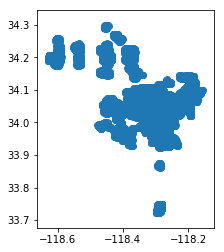

In [7]:
test = gpd.sjoin(intersections, toc_tiers, how = 'inner', op = 'intersects')
test.plot()

In [8]:
print(f'# obs in intersections: {len(intersections)}')
print(f'# obs in clipped intersections: {len(test)}')

# obs in intersections: 41183
# obs in clipped intersections: 16487
